In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import math

In [2]:
base_path = '/mnt/c/Users/User/Desktop/HRF_Comparison/HRF_Comparison/'

sub_dirs = os.listdir(base_path)
sub_dirs

df_dict = {}

In [3]:
f'{4:03}'

'004'

In [4]:
num_expr = 100


for sub_dir in sub_dirs:
    a_df = pd.DataFrame({'Loss': [0.]*num_expr, 'D_stsp': [0.]*num_expr, 'D_H': [0.]*num_expr, '20-step PE': [0.]*num_expr})

    for i in range(1, num_expr+1):
        df = pd.read_csv(os.path.join(base_path, sub_dir, f'{i:03}', 'LossMetrics.csv'), sep=';')
        
        if not math.isnan(df.D_stsp.idxmin()) and df.D_stsp.min() < 1.:
            a_df.iloc[i-1] = df.iloc[df.D_stsp.idxmin()][['Loss', 'D_stsp', 'D_H', '20-step PE']]
        else:
            a_df.iloc[i-1] = np.array([-0.2, -0.2, -0.2, -0.2])
        
    df_dict[sub_dir] = a_df

In [5]:
df_dict.keys()

dict_keys(['HRF_0.2_data_HRF_Identity_Obs', 'HRF_0.2_data_Identity_Obs', 'HRF_0.2_noise_0.01_data_HRF_Identity_Obs', 'HRF_0.2_noise_0.01_data_Identity_Obs', 'HRF_0.2_noise_0.1_data_HRF_Identity_Obs', 'HRF_0.2_noise_0.1_data_Identity_Obs', 'HRF_0.5_data_HRF_Identity_Obs', 'HRF_0.5_data_Identity_Obs', 'HRF_0.5_noise_0.01_data_HRF_Identity_Obs', 'HRF_0.5_noise_0.01_data_Identity_Obs', 'HRF_0.5_noise_0.1_data_HRF_Identity_Obs', 'HRF_0.5_noise_0.1_data_Identity_Obs', 'HRF_1.2_data_HRF_Identity_Obs', 'HRF_1.2_data_Identity_Obs', 'HRF_1.2_noise_0.01_data_HRF_Identity_Obs', 'HRF_1.2_noise_0.01_data_Identity_Obs', 'HRF_1.2_noise_0.1_data_HRF_Identity_Obs', 'HRF_1.2_noise_0.1_data_Identity_Obs', 'Linear_data_HRF_Identity_Obs', 'Linear_data_Identity_Obs'])

In [6]:
a_df = df_dict['Linear_data_Identity_Obs']
b_df = df_dict['Linear_data_HRF_Identity_Obs']

c_df = df_dict['HRF_1.2_data_Identity_Obs']
d_df = df_dict['HRF_1.2_data_HRF_Identity_Obs']

e_df = df_dict['HRF_0.5_data_Identity_Obs']
f_df = df_dict['HRF_0.5_data_HRF_Identity_Obs']

g_df = df_dict['HRF_0.2_data_Identity_Obs']
h_df = df_dict['HRF_0.2_data_HRF_Identity_Obs']



In [7]:
i_df = df_dict['HRF_1.2_noise_0.01_data_Identity_Obs']
j_df = df_dict['HRF_1.2_noise_0.01_data_HRF_Identity_Obs']

k_df = df_dict['HRF_1.2_noise_0.1_data_Identity_Obs']
l_df = df_dict['HRF_1.2_noise_0.1_data_HRF_Identity_Obs']

i1_df = df_dict['HRF_0.5_noise_0.01_data_Identity_Obs']
j1_df = df_dict['HRF_0.5_noise_0.01_data_HRF_Identity_Obs']

k1_df = df_dict['HRF_0.5_noise_0.1_data_Identity_Obs']
l1_df = df_dict['HRF_0.5_noise_0.1_data_HRF_Identity_Obs']

i2_df = df_dict['HRF_0.2_noise_0.01_data_Identity_Obs']
j2_df = df_dict['HRF_0.2_noise_0.01_data_HRF_Identity_Obs']

k2_df = df_dict['HRF_0.2_noise_0.1_data_Identity_Obs']
l2_df = df_dict['HRF_0.2_noise_0.1_data_HRF_Identity_Obs']

In [ ]:
measure = "D_stsp"
bins=np.histogram(np.hstack((a_df[measure], b_df[measure], c_df[measure], d_df[measure], e_df[measure],  f_df[measure], g_df[measure], h_df[measure])), bins=30)[1]

fig, ax = plt.subplots(2, 2, figsize=(15,9))
fig.suptitle("Comparison of " + measure, fontsize=15)


a_df[measure].hist(ax=ax[0,0], bins=bins, alpha=0.5, label="Linear Observation Model")
b_df[measure].hist(ax=ax[0,0], bins=bins, alpha=0.5, label="Convolutional Observation Model")
ax[0,0].set_title("Unconvoluted dataset $B*Z$")
ax[0,0].legend(fontsize=12)


c_df[measure].hist(ax=ax[0,1], bins=bins, alpha=0.5, label="Linear Observation Model")
d_df[measure].hist(ax=ax[0,1], bins=bins, alpha=0.5, label="Convolutional Observation\n Model")
ax[0,1].set_title("Convoluted dataset $B*hrf_{1.2}*Z$")
ax[0,1].legend(fontsize=12)


e_df[measure].hist(ax=ax[1,0], bins=bins, alpha=0.5, label="Linear Observation Model")
f_df[measure].hist(ax=ax[1,0], bins=bins, alpha=0.5, label="Convolutional Observation Model")
ax[1,0].set_title("Convoluted dataset $B*hrf_{0.5}*Z$")
ax[1,0].legend(fontsize=12)


g_df[measure].hist(ax=ax[1,1], bins=bins, alpha=0.5, label="Linear Observation Model")
h_df[measure].hist(ax=ax[1,1], bins=bins, alpha=0.5, label="Convolutional Observation Model")
ax[1,1].set_title("Convoluted dataset $B*hrf_{0.2}*Z$")
ax[1,1].legend(fontsize=12)


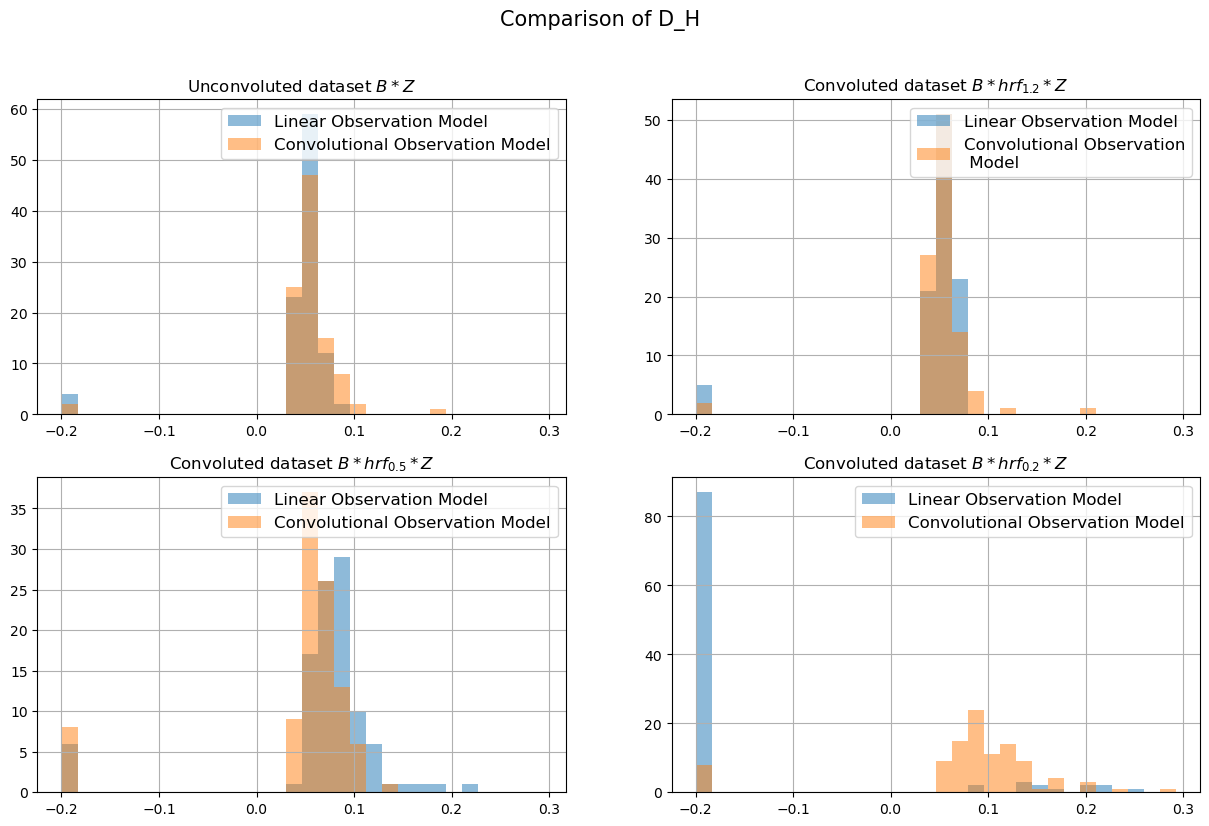

In [9]:
measure = "D_H"
bins=np.histogram(np.hstack((a_df[measure], b_df[measure], c_df[measure], d_df[measure], e_df[measure],  f_df[measure], g_df[measure], h_df[measure])), bins=30)[1]


fig, ax = plt.subplots(2, 2, figsize=(15,9))
fig.suptitle("Comparison of " + measure, fontsize=15)


a_df[measure].hist(ax=ax[0,0], bins=bins, alpha=0.5, label="Linear Observation Model")
b_df[measure].hist(ax=ax[0,0], bins=bins, alpha=0.5, label="Convolutional Observation Model")
ax[0,0].set_title("Unconvoluted dataset $B*Z$")
ax[0,0].legend(fontsize=12)


c_df[measure].hist(ax=ax[0,1], bins=bins, alpha=0.5, label="Linear Observation Model")
d_df[measure].hist(ax=ax[0,1], bins=bins, alpha=0.5, label="Convolutional Observation\n Model")
ax[0,1].set_title("Convoluted dataset $B*hrf_{1.2}*Z$")
ax[0,1].legend(fontsize=12)


e_df[measure].hist(ax=ax[1,0], bins=bins, alpha=0.5, label="Linear Observation Model")
f_df[measure].hist(ax=ax[1,0], bins=bins, alpha=0.5, label="Convolutional Observation Model")
ax[1,0].set_title("Convoluted dataset $B*hrf_{0.5}*Z$")
ax[1,0].legend(fontsize=12)


g_df[measure].hist(ax=ax[1,1], bins=bins, alpha=0.5, label="Linear Observation Model")
h_df[measure].hist(ax=ax[1,1], bins=bins, alpha=0.5, label="Convolutional Observation Model")
ax[1,1].set_title("Convoluted dataset $B*hrf_{0.2}*Z$")
ax[1,1].legend(fontsize=12)

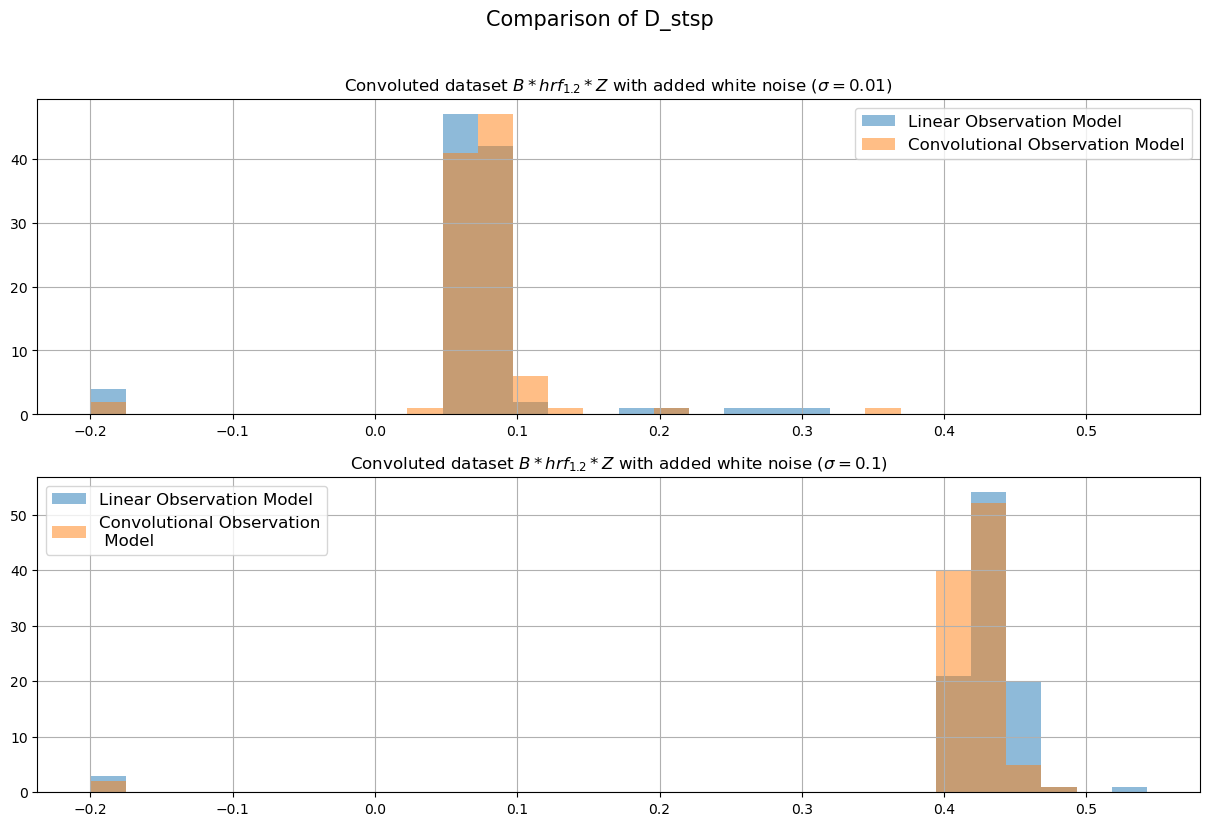

In [10]:
measure = "D_stsp"
bins=np.histogram(np.hstack((i_df[measure], j_df[measure], k_df[measure], l_df[measure])), bins=30)[1]

fig, ax = plt.subplots(2, 1, figsize=(15,9))
fig.suptitle("Comparison of " + measure, fontsize=15)


i_df[measure].hist(ax=ax[0], bins=bins, alpha=0.5, label="Linear Observation Model")
j_df[measure].hist(ax=ax[0], bins=bins, alpha=0.5, label="Convolutional Observation Model")
ax[0].set_title("Convoluted dataset $B*hrf_{1.2}*Z$ with added white noise ($\sigma=0.01$)")
ax[0].legend(fontsize=12)


k_df[measure].hist(ax=ax[1], bins=bins, alpha=0.5, label="Linear Observation Model")
l_df[measure].hist(ax=ax[1], bins=bins, alpha=0.5, label="Convolutional Observation\n Model")
ax[1].set_title("Convoluted dataset $B*hrf_{1.2}*Z$ with added white noise ($\sigma=0.1$)")
ax[1].legend(fontsize=12)

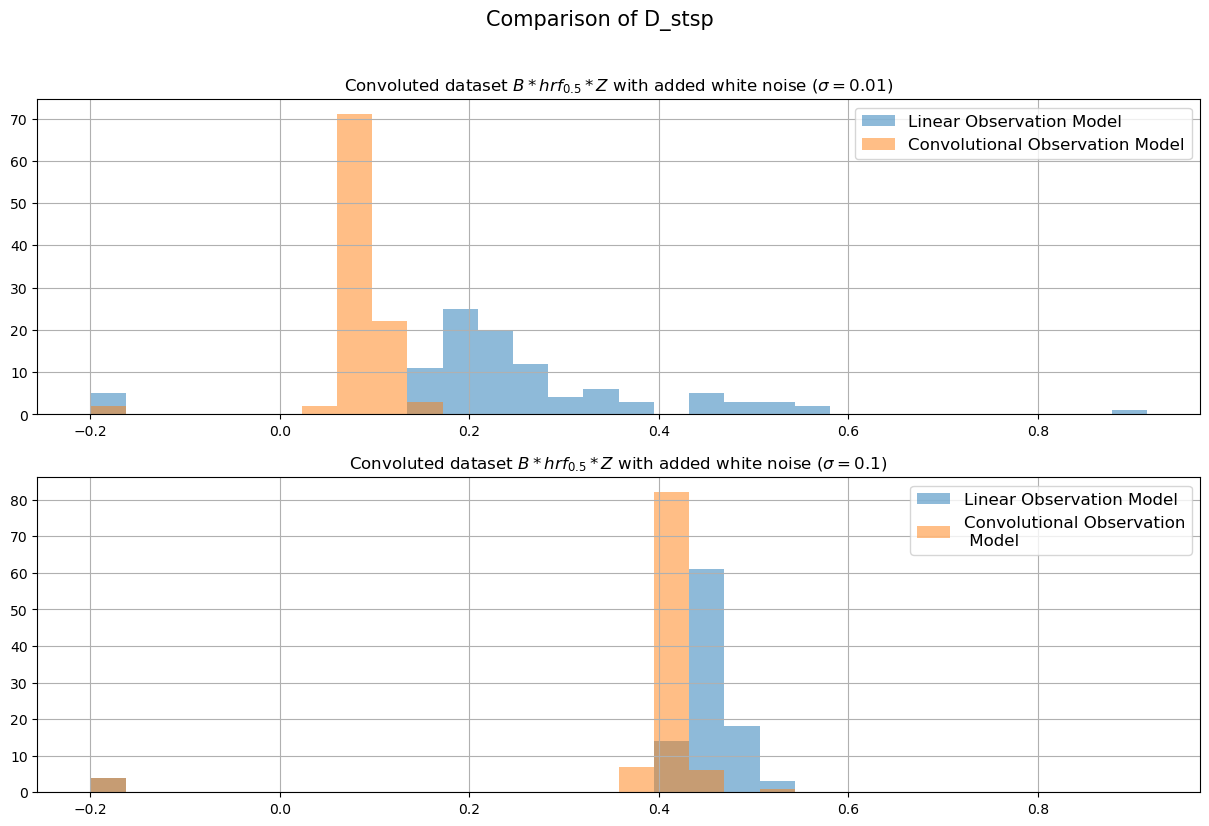

In [16]:
measure = "D_stsp"
hrf_tr = 0.5

bins=np.histogram(np.hstack((i1_df[measure], j1_df[measure], k1_df[measure], l1_df[measure])), bins=30)[1]

fig, ax = plt.subplots(2, 1, figsize=(15,9))
fig.suptitle("Comparison of " + measure, fontsize=15)


i1_df[measure].hist(ax=ax[0], bins=bins, alpha=0.5, label="Linear Observation Model")
j1_df[measure].hist(ax=ax[0], bins=bins, alpha=0.5, label="Convolutional Observation Model")
ax[0].set_title("Convoluted dataset $B*hrf_{0.5}*Z$ with added white noise ($\sigma=0.01$)")
ax[0].legend(fontsize=12)


k1_df[measure].hist(ax=ax[1], bins=bins, alpha=0.5, label="Linear Observation Model")
l1_df[measure].hist(ax=ax[1], bins=bins, alpha=0.5, label="Convolutional Observation\n Model")
ax[1].set_title("Convoluted dataset $B*hrf_{0.5}*Z$ with added white noise ($\sigma=0.1$)")
ax[1].legend(fontsize=12)

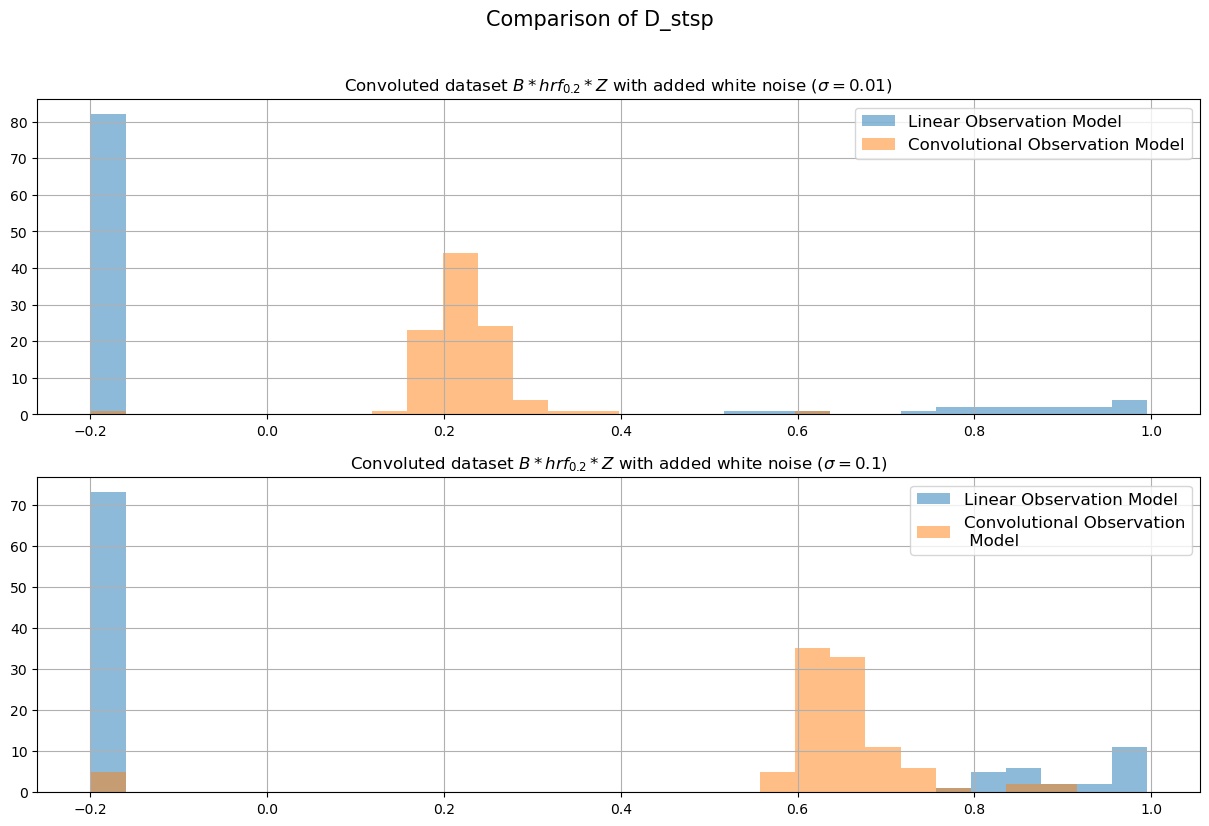

In [17]:
measure = "D_stsp"

bins=np.histogram(np.hstack((i2_df[measure], j2_df[measure], k2_df[measure], l2_df[measure])), bins=30)[1]

fig, ax = plt.subplots(2, 1, figsize=(15,9))
fig.suptitle("Comparison of " + measure, fontsize=15)


i2_df[measure].hist(ax=ax[0], bins=bins, alpha=0.5, label="Linear Observation Model")
j2_df[measure].hist(ax=ax[0], bins=bins, alpha=0.5, label="Convolutional Observation Model")
ax[0].set_title("Convoluted dataset $B*hrf_{0.2}*Z$ with added white noise ($\sigma=0.01$)")
ax[0].legend(fontsize=12)


k2_df[measure].hist(ax=ax[1], bins=bins, alpha=0.5, label="Linear Observation Model")
l2_df[measure].hist(ax=ax[1], bins=bins, alpha=0.5, label="Convolutional Observation\n Model")
ax[1].set_title("Convoluted dataset $B*hrf_{0.2}*Z$ with added white noise ($\sigma=0.1$)")
ax[1].legend(fontsize=12)